In [1]:
from main import run_main
import pandas as pd
import time
from copy import copy
import matplotlib.pyplot as plt

Correcciones!

graficar el fitness en función de la cantidad de generaciones 

definir que es la diversidad en nuestro conjunto -> delta en los genes y graficarla 

que pasa si soy más elitista

que pasa si soy más estocadtico 

que se vea reflejado


In [2]:
CROSSOVER_METHODS = ["one_point", "double_point", "uniform", "anular"]
SELECTION_METHODS = ["elite", "roulette", "universal", "boltzmann", "deterministic_tournament", "probabilistic_tournament", "ranking"]
MUTATION_METHODS = ["gene_mutation","uniform_multigen", "complete_mutation", "limited_multigen"]
GENES = ["items", "height"]
NEW_GENERATION_METHODS = ["use_all", "new_over_actual"]
CHARACTER_TYPES = ["warrior", "archer", "defender", "infiltrator"]

In [3]:
config = {
    "N": 150, 
    "K": 90,
    "M": 45,
    "threshold": 0.7,
    "character_type": "archer",
    "selection_method_1": "deterministic_tournament",
    "selection_method_2": "boltzmann", 
    "selection_method_3": "deterministic_tournament", 
    "selection_method_4": "boltzmann",  
    "crossing_method": "double_point",
    "mutation_method": "uniform_multigen",
    "new_generation_method": "new_over_actual",
    "gene": "items",
    "A": 0.5,
    "B": 0.5,
    "p_m": 0.1,
    "Tc": 0.1,
    "T0": 10,
    "k": 2,
    "max_generations": 100,
    "max_generations_without_change": 5,
    "delta": 0.01,
    "optimal_fitness": 100,
    "optimal_fitness_error": 2
}

Nota 1:

Fitness en funcion de cantidad de generaciones.

Vamos a tomar una poblacion grande, configuracion fija e ir variando la cantidad maxima de generaciones para formar los datos.

In [4]:
gen_limit = 200
repeats = 10

totalIterations = ((gen_limit-1) * repeats)

lista = []

currentIteration = 0 
startTime = time.time()



for max_gen in range(1,gen_limit):
    for _ in range(repeats):
        configCopy = copy(config)
        configCopy['max_generations'] = max_gen

        lista.append((run_main(configCopy),configCopy))
        currentIteration += 1
        if currentIteration % 20 == 0:  # Actualizar cada 100 iteraciones
            elapsedTime = time.time() - startTime
            estimatedRemainingTime = (totalIterations - currentIteration) * (elapsedTime / currentIteration)
            percentageCompletion = (currentIteration / totalIterations) * 100
            print(f"\rCompletion: {percentageCompletion:.2f}% ETA: {estimatedRemainingTime:.2f}s", end="")


Completion: 99.50% ETA: 32.15sss

In [5]:
lista_aux = [{**{"strength": char[0]._items["strength"],
           "agility": char[0]._items["agility"],
           "expertise": char[0]._items["expertise"],
           "endurance": char[0]._items["endurance"],
           "health": char[0]._items["health"],
           "height": char[0]._height,
           "performance": char[0].get_performance(),
           "generation": char[1]},
        **conf}
       for char, conf in lista]

df = pd.DataFrame(lista_aux)


In [6]:
df.to_csv('datos1.csv', index=False)

In [7]:
meanPerformanceByGeneration = df.groupby('generation')['performance'].mean().reset_index()

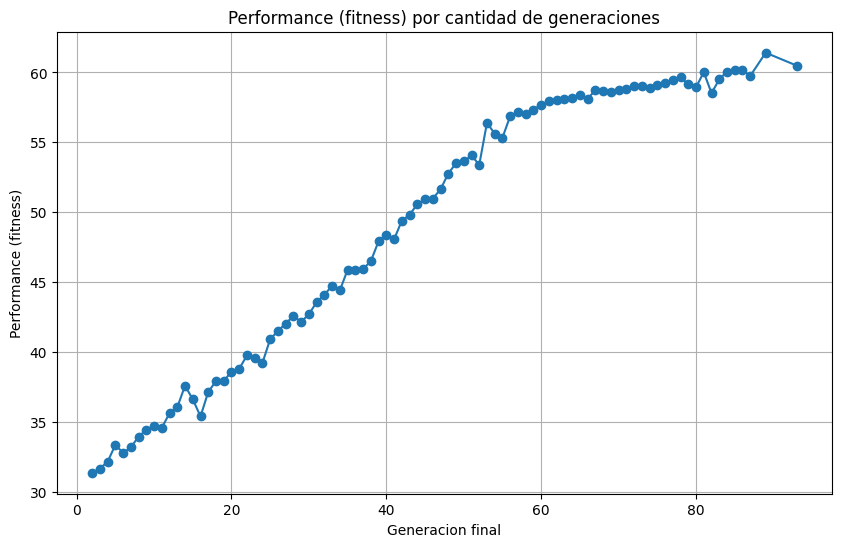

In [8]:

plt.figure(figsize=(10, 6))
plt.plot(meanPerformanceByGeneration['generation'], meanPerformanceByGeneration['performance'], marker='o')
plt.title('Performance (fitness) por cantidad de generaciones')
plt.xlabel('Generacion final')
plt.ylabel('Performance (fitness)')
plt.grid(True)
plt.show()

In [9]:
gen_limit = 200
repeats = 10

totalIterations = ((gen_limit-1) * repeats * 3)

lista_2 = []

currentIteration = 0 
startTime = time.time()



for max_gen in range(1,gen_limit):
    for select in ['elite','roulette','probabilistic_tournament']:
        for _ in range(repeats):
            configCopy = copy(config)

            configCopy['max_generations'] = max_gen
            configCopy['selection_method_1'] = select
            configCopy['selection_method_2'] = select
            configCopy['selection_method_3'] = select
            configCopy['selection_method_4'] = select

            lista_2.append((run_main(configCopy),configCopy))
            currentIteration += 1
            if currentIteration % 20 == 0:  # Actualizar cada 100 iteraciones
                elapsedTime = time.time() - startTime
                estimatedRemainingTime = (totalIterations - currentIteration) * (elapsedTime / currentIteration)
                percentageCompletion = (currentIteration / totalIterations) * 100
                print(f"\rCompletion: {percentageCompletion:.2f}% ETA: {estimatedRemainingTime:.2f}s", end="")


Completion: 99.83% ETA: 1.53sss

In [10]:
lista_aux_2 = [{**{"strength": char[0]._items["strength"],
           "agility": char[0]._items["agility"],
           "expertise": char[0]._items["expertise"],
           "endurance": char[0]._items["endurance"],
           "health": char[0]._items["health"],
           "height": char[0]._height,
           "performance": char[0].get_performance(),
           "generation": char[1]},
        **conf}
       for char, conf in lista_2]

df2 = pd.DataFrame(lista_aux_2)

In [11]:
df2.to_csv('datos2.csv', index=False)

In [12]:
meanPerformanceByGenerationMethod = df2.groupby(['generation', 'selection_method_1'])['performance'].mean().reset_index()

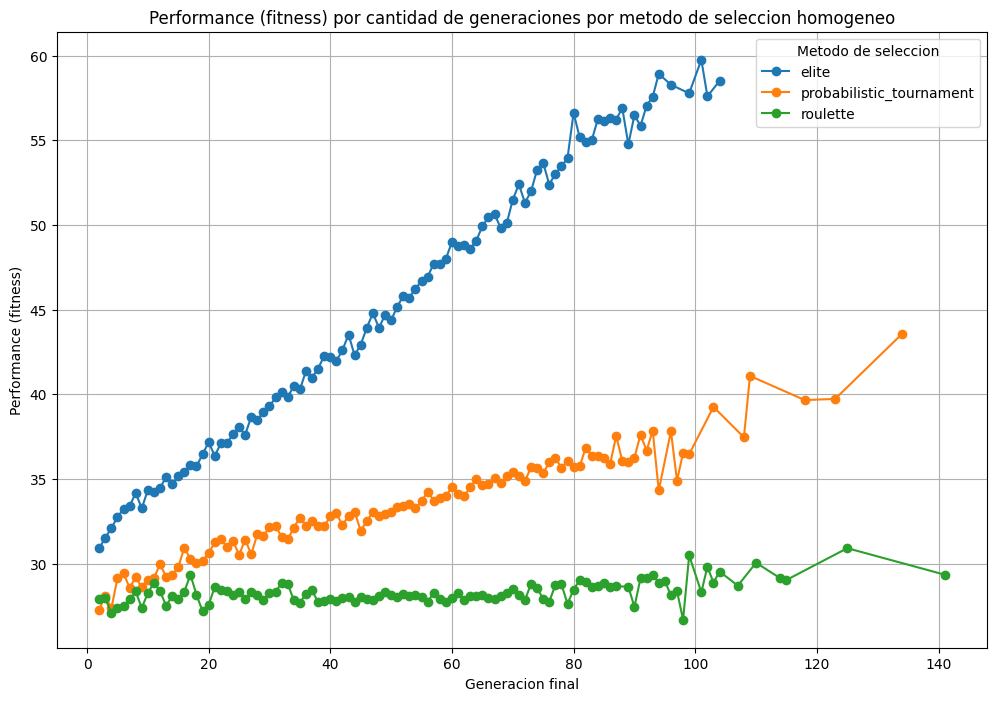

In [13]:
plt.figure(figsize=(12, 8))

for method in meanPerformanceByGenerationMethod['selection_method_1'].unique():
    subset = meanPerformanceByGenerationMethod[meanPerformanceByGenerationMethod['selection_method_1'] == method]
    plt.plot(subset['generation'], subset['performance'], marker='o', label=method)

plt.title('Performance (fitness) por cantidad de generaciones por metodo de seleccion homogeneo')
plt.xlabel('Generacion final')
plt.ylabel('Performance (fitness)')
plt.legend(title='Metodo de seleccion')
plt.grid(True)
plt.show()